## Лабораторна робота №3.
***Data Pre-Processing***

Оцінювання даної роботи буде ураховувати якість ваших візуалізацій (вони можуть незначно відрізнятися від прикладів, але повинні змістовно відображати суть задачі) та опис отриманих вами результатів. При наявності ЛИШЕ візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.

Під час виконання вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

Для виконання цієї лабораторної роботи Вам необхідно скористатися вибіркою [titanic.csv](https://gist.github.com/michhar/2dfd2de0d4f8727f873422c5d959fff5).  
Цей датасет ви вже використовували в лабораторній роботі №1 ;)  
  
  ```NB:побудовані графіки та гістограми мають бути змістовними і візуально зрозумілими.``` 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
sns.set_context('talk')

***Завдання 1.*** Перед початком роботи з будь яким датасетом, необхідно:  
- завантажити датасет;  
- вивести основну статистичну інформацію по числовим змінним;
- вивести розмірність датасету;
- перевірити типи змінних і кількість данних по кожній змінній.

In [14]:
dataset = pd.read_csv('titanic.csv')

dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
print(f"Dataset dimensions: {dataset.shape}")

Dataset dimensions: (891, 12)


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


***Завдання 2.*** Визначити кількість пропущених значень по кожному атрибуту

In [17]:
miss_value = dataset.isnull().sum()
miss_value

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Ваші висновки:
1. В нас є 177 пропущених значень Age, що є погано але не критично тому ми залишаємо ці дані для подальшого аналізу
2. В нас є 687 пропущених значень Cabin, що є критично погано, оскільки більше 80% даних відсутні ми повинні видалити дану колонку, тому що для аналізу вона в подальшому не зможе бути корисною.
3. В нас є 2 пропущених значень в Embarked, що є нормально і на аналіз не повинно б ніяк критично впливати, тому ми залишаємо ці дані

***Завдання 3:*** Побудувати матрицю кореляції 



1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

3. Описати отримані результати, спираючись на значення коефіціентів кореляції



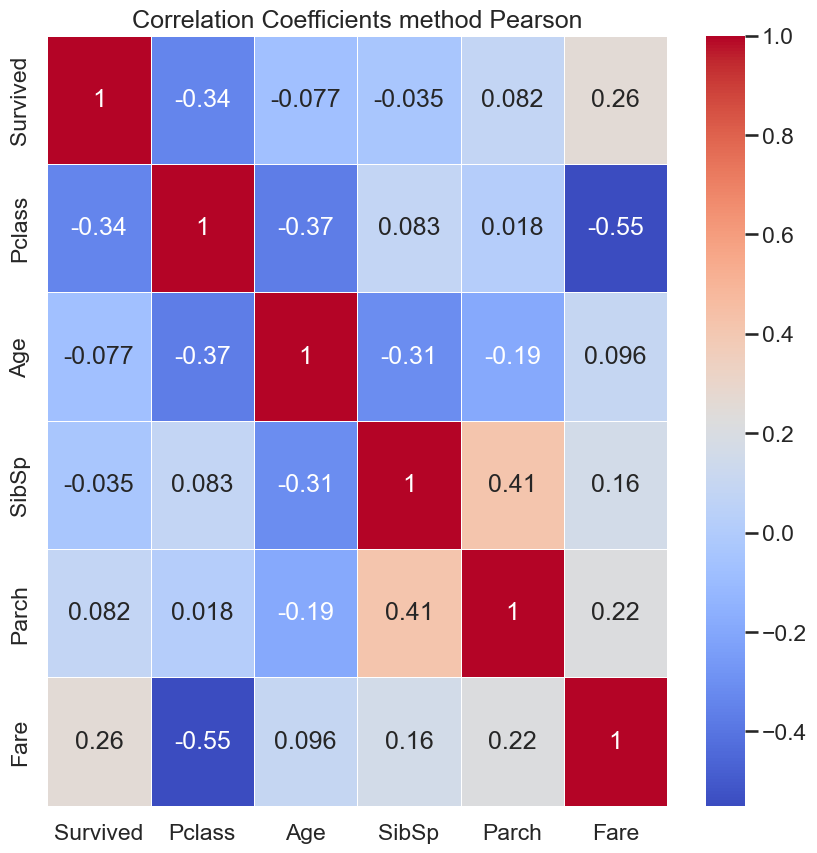

In [18]:
dataset = pd.read_csv('titanic.csv') 

dataset = dataset.drop(columns=['PassengerId','Name','Sex','Embarked','Ticket','Cabin'])

correlation_matrix = dataset.corr(method='pearson')


plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Coefficients method Pearson')
plt.show()

Ваші висновки:
1. В нас багато значень в яких кореляція прямує до 0, що означає відсутність сильної залежності між даними
2. Можемо побачити що змінна Age має відносно високий коофіцієнт кореляції з змінними Sibsp,Pclass. А змінна Pclass з Survived, що означає про певне хорошу залежність між ними
3. Досить хороша залежність є між атрибутами SipSp i Parch. Така залежність може вплинути на подальший аналіз.
4. Залежність між Pclass i Fare є найбільшою і найвпливовішою, залежність є сильною і буде точно впилвати на подальший аналіз

**Завдання 4:** Як ви могли помітити, у нашому датесеті досить багато пропущених значень, зокрема у атрибута віку пасажирів. Робота з такими даними впливае як на результат моделювання так і на загалом уявлення цілісної картини про дані. Тож для того, що позбавитися пропусків ми використаємо заповнення пропущених значень медіаною за групами.



1.   Напишіть функцію, що на вхід приймає датафрейм, назву колонки з пропущеними значеннями та список групуючих колонок та повертає датафрейм з заповненими пропущеними значеннями
2.   Наведіть приклад роботи функції та зробіть перевірку на пропущені значення (дивись **завдання 2**)



In [19]:
dataset = pd.read_csv('titanic.csv') 

def fill_missing_values_by_group_median(dataset, col, group_cols):
    grouped_df = dataset.groupby(group_cols)[col]

    median_values = grouped_df.median()

    median_dict = median_values.to_dict()

    dataset[col] = dataset[col].fillna(dataset.apply(lambda row: median_dict[tuple(row[group_cols])], axis=1))
    return dataset

print("Missing values in Age before:", dataset['Age'].isnull().sum())

dataset = fill_missing_values_by_group_median(dataset, 'Age', ['Sex', 'Pclass'])

print("Missing values in Age after:", dataset['Age'].isnull().sum())
dataset.isnull().sum()


Missing values in Age before: 177
Missing values in Age after: 0


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Ваші висновки:**
Після заповення даних наш середній вік змінився, але не дуже сильно, в межах 0.6. Це може свідчити про коректне заповнення пропущених значень за допомогою медіани

 
***Завдання 5:*** В моделях машинного навчання інснує велика проблема опрацювання безперервних змінних. Потрібно перетворити безперервні значення в категоріальні. 

Максимальний вік пасажира - ```80 років```.

Отже, давайте розділимо діапазон від ```0 до 80``` на ```5``` осередків. 


Додайте до нашого датасету нову колонку ```Age_bin```, в якій будуть значення ```0, 1, 2, 3, 4```відповідно кожній віковій групі.

Побудуйте графік, який відображає кількість виживших у кожній віковій категорії.





C:\Users\user\AppData\Local\Temp\ipykernel_19088\1797214365.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = dataset.groupby('Age_bin')['Survived'].value_counts()


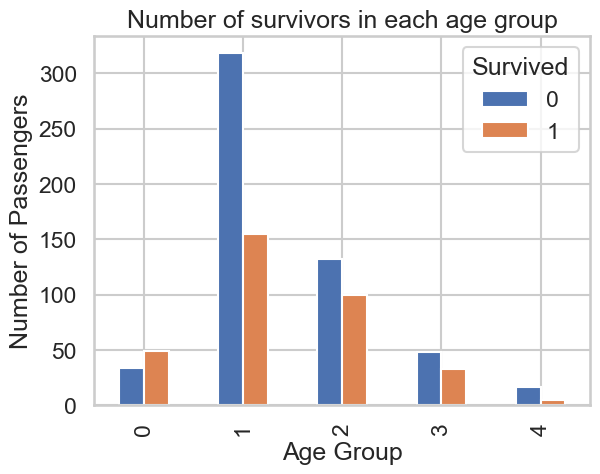

In [20]:
age_bins = [0, 15, 30, 45, 60, 80]
dataset['Age_bin'] = pd.cut(dataset['Age'], age_bins, labels=range(len(age_bins)-1))

age_group_counts = dataset.groupby('Age_bin')['Survived'].value_counts()

age_group_counts.unstack().plot(kind='bar')
plt.title('Number of survivors in each age group')
plt.xlabel('Age Group')
plt.ylabel('Number of Passengers')
plt.show()

**Ваші висновки:** Можемо побачити що людей в 1 віковій категорії(15-30) загинуло і вижило найбільше, в 4 категорії(60-80) найменше. Також можемо за цим графіком швидко побачити люди якого віку були на борту та в якій кількості, тобто старих людей було дуже мало а молодих дуже багато.

***Завдання 6:*** Так як змінна ```fare``` також є неперервною її треба закодувати до ```порядкової шкали``` 
Для цього скоритайтесь функцією ```pandas.qcut```.
[pandas.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)  
- необхідно перевірити, чи є вірною гіпотеза про те, що кількість виживших пасажирів для квартильних значеннь змінної ```fare``` відрізняється, та чи доцільно використовувати кодування на цю змінну(для подальшої роботи з закодованою фичею)

Chi-square statistic: 80.174
p-value: 0.000
There is a significant relationship between the fare bins and the survival status.


C:\Users\user\AppData\Local\Temp\ipykernel_19088\597636201.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_group_counts = dataset.groupby('Fare_bin')['Survived'].value_counts()


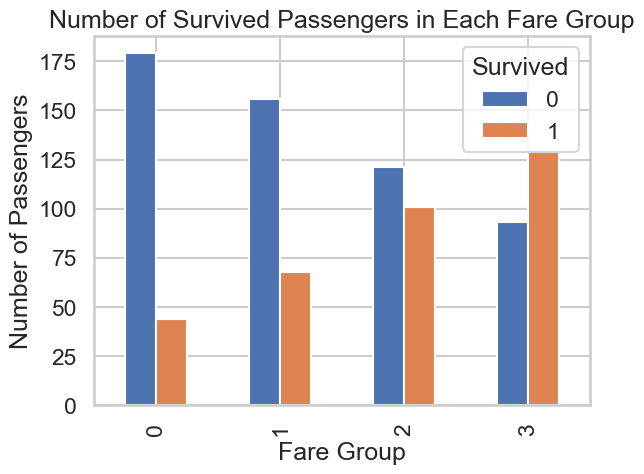

In [21]:
fare_bins = pd.qcut(dataset['Fare'], 4, labels=range(4))
dataset['Fare_bin'] = fare_bins

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(dataset['Fare_bin'], dataset['Survived'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3f}")

if p_value < 0.05:
    print("There is a significant relationship between the fare bins and the survival status.")
else:
    print("There is no significant relationship between the fare bins and the survival status.")


fare_group_counts = dataset.groupby('Fare_bin')['Survived'].value_counts()


fare_group_counts.unstack().plot(kind='bar')
plt.title('Number of Survived Passengers in Each Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Number of Passengers')
plt.show()

**Ваші висновки**: Так наша гіпотеза підтвердилася і ціна за квиток впливала на те чи вижила людина чи ні, адже під собою воно означає щоб у людини був кращий клас, тобто вона могла бути швидше до рятувальних палуб і її життя надавали більше перевагу. Наша гіпотеза була підтверджена за допомогою хі-квадрат.


***Завдання 7:*** Необхідно створити нові змінні ```Family_size``` та ```Alone``` та проаналізувати їх. Змінна ```Family_size``` передає суму змінних ```Parch``` та ```SibSp```. Змінна ```Family_size``` буде відібражати комбіновані дані, які необхідні для перевірки гіпотези, що ```виживання пасажирів залежить від кількості членів їх сім'ї```. Змінна ```Alone``` позначає наявніть сім'ї.

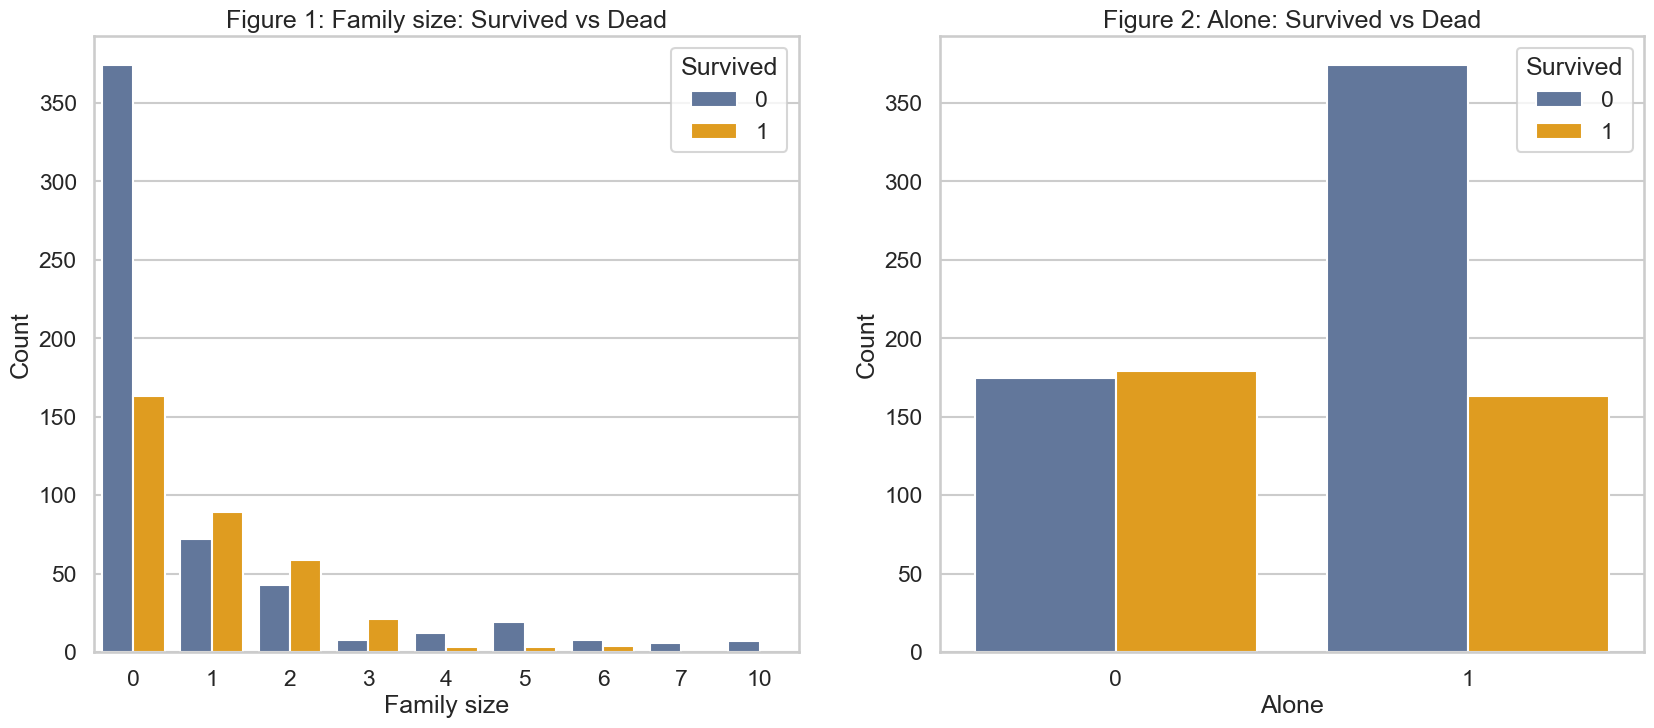

In [22]:
dataset['Family_size'] = dataset[["Parch", "SibSp"]].sum(axis=1)

dataset['Alone'] = dataset.apply(lambda row: 1 if row["Family_size"] == 0 else 0, axis=1)

family_size_counts = dataset.groupby("Family_size")["Survived"].value_counts()

alones_counts = dataset.groupby("Alone")["Survived"].value_counts()

survived_family = pd.DataFrame({"Survived": family_size_counts.index.get_level_values("Survived"), "Family size": family_size_counts.index.get_level_values("Family_size"), "Count": family_size_counts.values})
survived2_alone = pd.DataFrame({"Survived": alones_counts.index.get_level_values("Survived"), "Alone": alones_counts.index.get_level_values("Alone"), "Count": alones_counts.values})


fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(20, 8))
sns.barplot(data = survived_family, x = "Family size", y = "Count", hue="Survived", ax=ax1, palette=['#5975A4', 'orange'])
sns.barplot(data = survived2_alone, x = "Alone", y = "Count", hue="Survived", ax=ax2, palette=['#5975A4', 'orange'])

ax1.set_title("Figure 1: Family size: Survived vs Dead")
ax2.set_title("Figure 2: Alone: Survived vs Dead")

plt.show()

**Ваші висновки:** З першого графіку можна побачити, що максимально в сім'ї було 10 людей. Велика частина людей не мала своєї сім'ї на титаніку, і людей з даної категорії набагато більше загинуло, ніж вижило. Проте ті пасажири, які мали від 1 до 3 родичів в сім'ї, мали кращу статистику виживання, оскільки в такому випадку більше людей вижило, аніж загинуло. Сім'ї, які мали більше людей, майже повністю вмирали. 

***Завдання 8:*** Видалити атрибути які є ***НЕрелевантними*** або містять багато пропущених значень. Аргументувати свій вибір.

In [23]:
dataset = dataset.drop('PassengerId' , axis =1)
dataset = dataset.drop('Ticket' , axis =1)
dataset = dataset.drop('Cabin' , axis =1)

**Ваші висновки:**

1. Я видалив PassengerId тому що це просто айдішка пасажира, яка нам для аналізу ніяк не знадобиться. Простий набір цифр
2. Я видалив Ticket тому що це просто цифри які не несуть для аналізу нічого корисного, набір випадкових цифр та букв які тільки можуть поскладнити аналіз
3. Я видалив Cabin тому що більше 80% даних незаповнено і з цим атрибутом неможливо працювати

***Завдання 9:*** Перетворіть змінні ```Sex```, ```Embarked``` та ```Title``` в числові значення


In [24]:
name = dataset["Name"]

dataset["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]
dataset["Title"] = dataset["Title"].map({'Mr': 0, 'Mrs': 1, 'Miss': 2, 'Master': 3, 'Dr': 4, 'Rev': 5, 'Major': 6, 'Col': 7, 'Ms': 8, 'Mme': 9, 'Don': 10, 'Lady': 11, 'Countess': 12, 'Jonkheer': 13})
dataset['Sex'] = dataset['Sex'].map({'male': 0, 'female': 1}).astype(int)

dataset['Embarked'] = dataset['Embarked'].fillna('-1')

dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2, '-1': -1}).astype(int)


In [25]:
dataset = dataset.drop('Name' , axis =1)

dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_bin,Fare_bin,Family_size,Alone,Title
0,0,3,0,22.0,1,0,7.2500,0,1,0,1,0,0.0
1,1,1,1,38.0,1,0,71.2833,1,2,3,1,0,1.0
2,1,3,1,26.0,0,0,7.9250,0,1,1,0,1,2.0
3,1,1,1,35.0,1,0,53.1000,0,2,3,1,0,1.0
4,0,3,0,35.0,0,0,8.0500,0,2,1,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1,1,0,1,5.0
887,1,1,1,19.0,0,0,30.0000,0,1,2,0,1,2.0
888,0,3,1,21.5,1,2,23.4500,0,1,2,3,0,2.0
889,1,1,0,26.0,0,0,30.0000,1,1,2,0,1,0.0


**Ваші висновки:** Кожному унікальному значенню в колонках Sex, Embarked та Title. Це перетворення ми зробили для того, щоб наші модельки машиного навчання змогли проводити аналіз даних адже на даному етапі вони сприймають певні числові значення.

***Завдання 10.*** Побудувати графіки всіх категоріальних змінних та проаналізувати скільки кожна категорія містить даних

1.   виділити категоріальні змінні 
2.   побудувати сітку графіків кількості спотрережень по кожній категорії



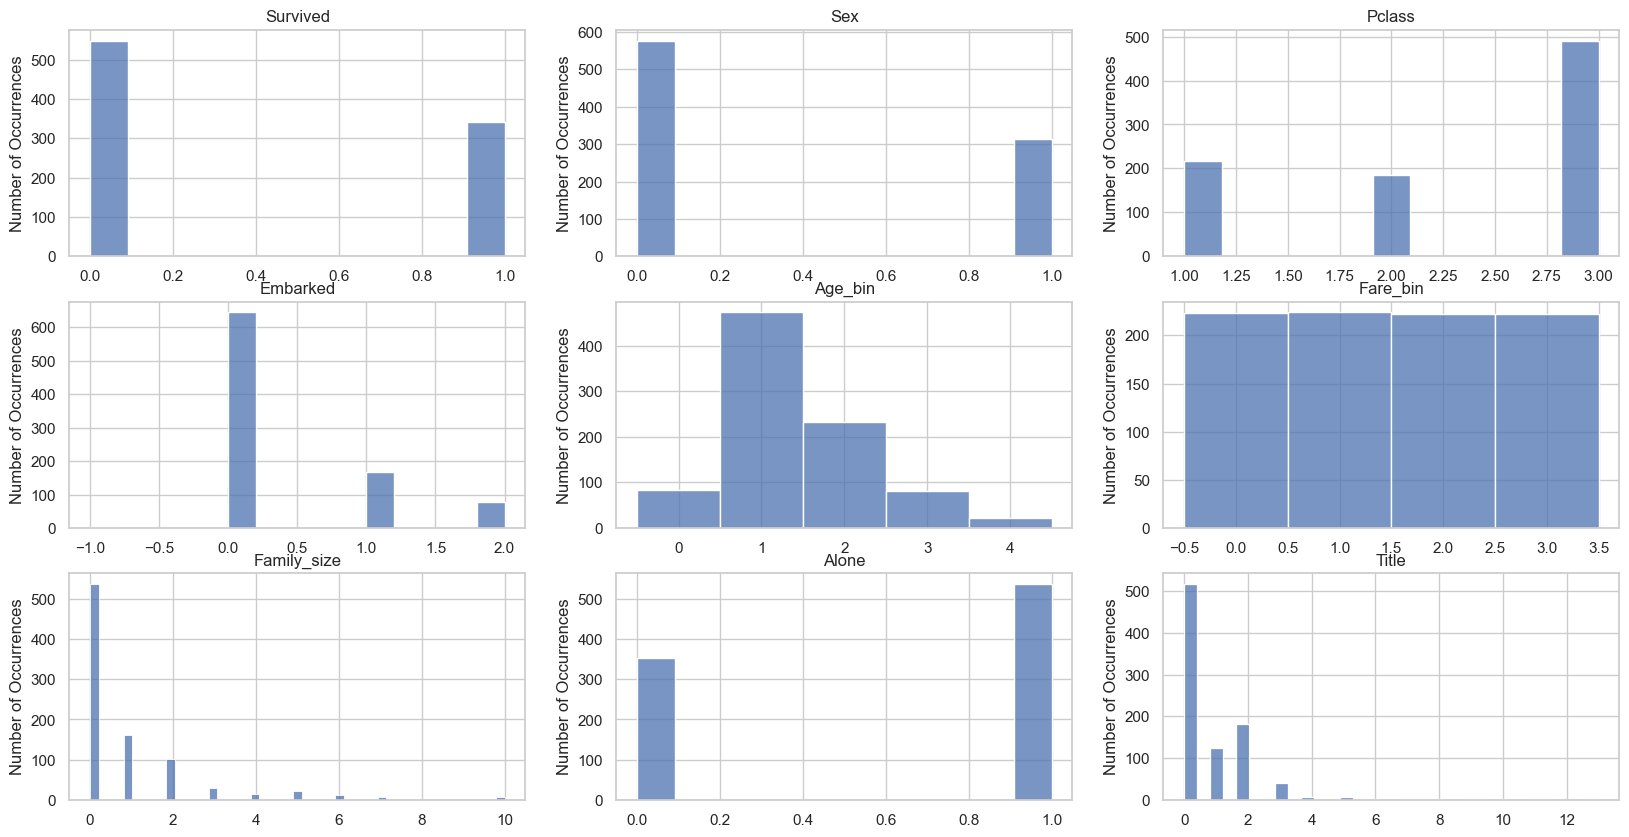

In [26]:

categorical_variables = ['Survived', 'Sex', 'Pclass', 'Embarked', 'Age_bin', 'Fare_bin', 'Family_size', 'Alone','Title']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))
for i, variable in enumerate(categorical_variables):
    sns.histplot(dataset[variable], kde=False, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(variable)
    axes[i//3, i%3].set_xlabel('')
    axes[i//3, i%3].set_ylabel('Number of Occurrences')
plt.show()


**Ваші висновки:** За домогою цих графіків ми можемо швидко побачити що несе за собою кожен категоріальний атрибут а також кількість повторень.Наприклад атрибут Survived має два значення - 0 та 1, де 0 загинули а 1 вижили. Наприклад значення 0, тобто близкько 550 людей загинуло. Таку ж аналогію можна провести з іншими графікамию

***Завдання 11.*** Побудувати діаграми розподілу всіх числових змінних

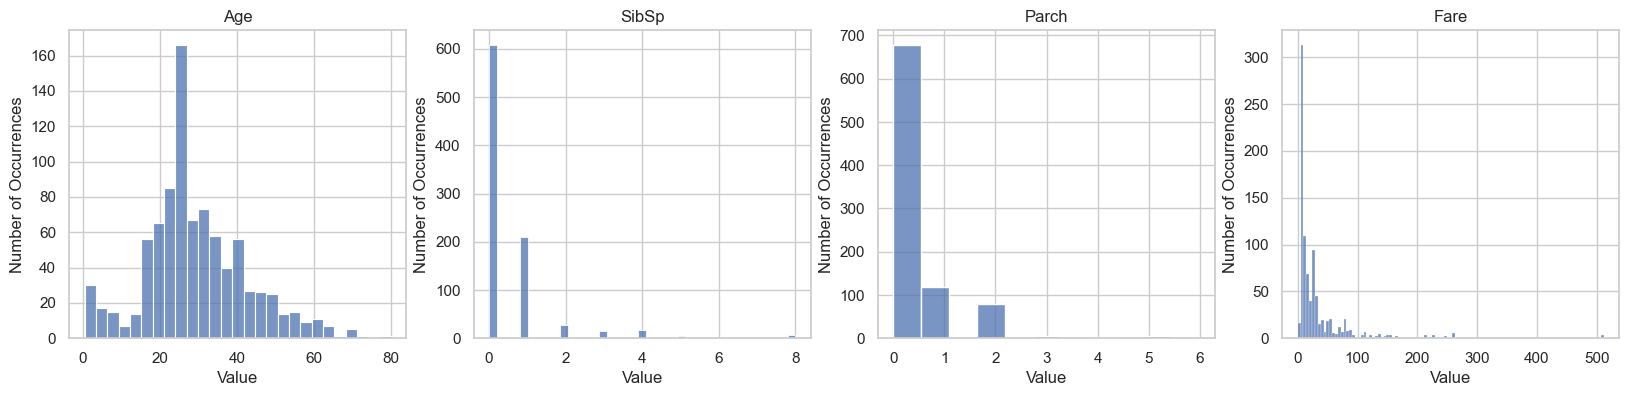

In [27]:
numerical_variables = ['Age', 'SibSp', 'Parch', 'Fare']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=len(numerical_variables), figsize=(20, 4))
for i, variable in enumerate(numerical_variables):
    sns.histplot(dataset[variable], kde=False, ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Number of Occurrences')
plt.show()

**Ваші висновки:** За цими графіками можна побачити яке значення в числових змінних повторяється найбільше і можна проводити швидкий аналіз. Наприклад атрибут Age, можемо побачити що людей віком близько 25 років було найбільше на кораблі.

##Співвіднонешшя між всіма числовими змінними 
  
***Завдання 12.*** В деяких випадках візуалізація співвідношення між змінними (числовими, категоріальними) дає можливість побачити викиди в змінних та знайти приховані тенденції і виділити навіть додаткові змінні. Тому, необхідно:
1) побудувати графіки співвідношення між всіма числовими змінними.  
2) описати отримані співвідношення і запропонувати як їх можна (чи не можна) використати

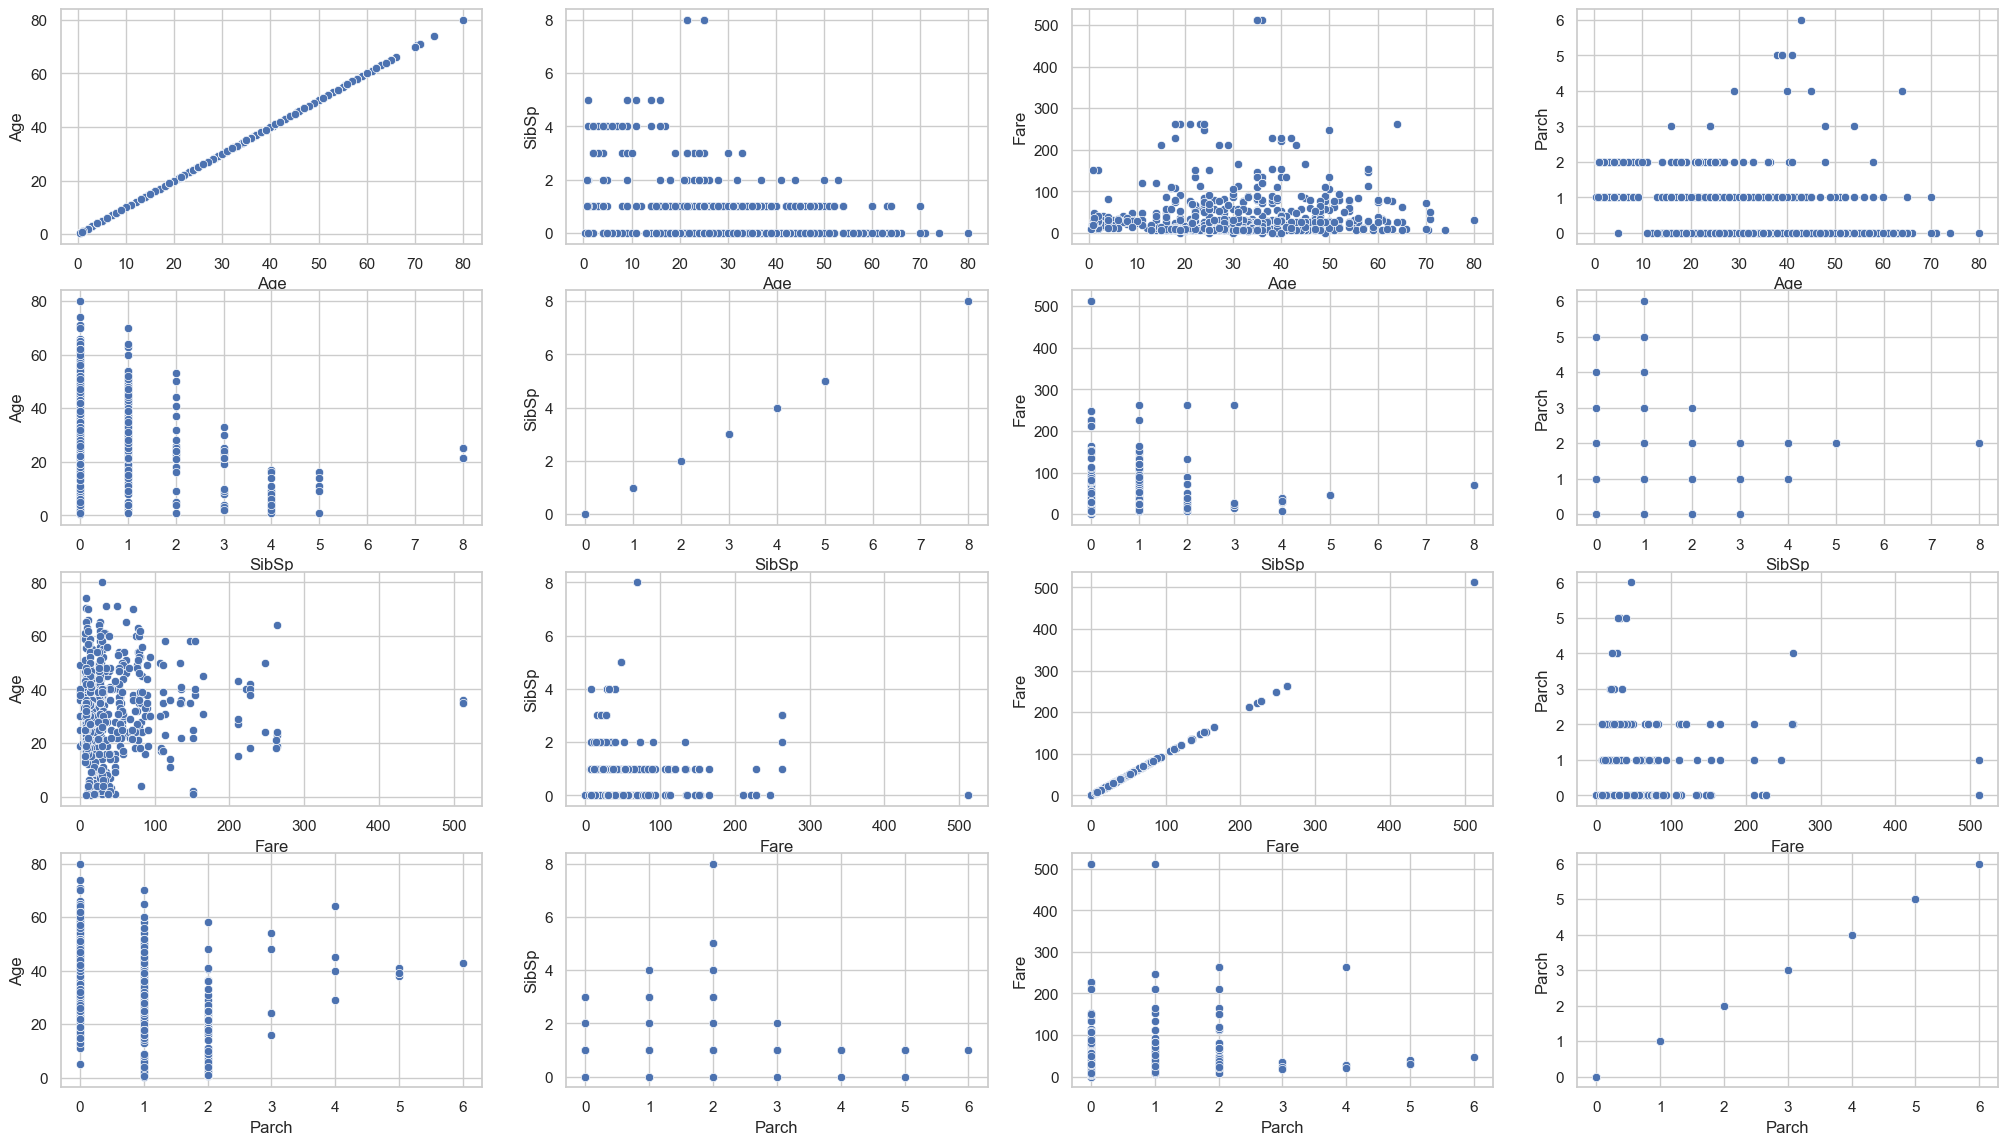

In [28]:
numericalVariables = ['Age', 'SibSp', 'Fare', 'Parch']

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=len(numericalVariables), ncols=len(numericalVariables), figsize=(25, 14))
for i, var1 in enumerate(numericalVariables):
    for j, var2 in enumerate(numericalVariables):
        sns.scatterplot(x=var1, y=var2, data=dataset, ax=axes[i,j])
        axes[i, j].set_xlabel(var1)
        axes[i, j].set_ylabel(var2)

plt.show()

**Ваші висновки:** За допомогою цих графіків ми можемо чітко побачити співвідношення і залежність між змінними. Наприклад за 2 графіком(SibSp & Age) можна побачити що чим більше в людини братів або сестер тим вік за графіком спадає. За графіком (Age & Fare) можна побачити що люди віком від 20 до 45 брали квитки від 200 до 300 доларів, а більшість інших квитків брали менше 100 доларів. Також на графіках можемо побачити так звані викиди(шум) який має свій вплив на подальший аналіз.

Кожне правильно виконане завдання буде оцінюватись в ```2 бали```.